<a href="https://colab.research.google.com/github/kevinmcmanus/Astrophysics/blob/master/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab I: The Colorado Model Solar System

Kevin McManus

In [0]:
#@title
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#@title
obs = pd.DataFrame([
    ('Sun',     5614, 'Grapefruit', 1,         1,          1,    1),
    ('Mercury', 5622, 'dot',        58.7*24.0, 88,         0.38, 0.056),
    ('Venus',   5634, 'dot',       -243*24.0,  225,        0.95, 0.62),
    ('Earth',   5640, 'dot',        23.9,      365,        1,    1),
    ('Mars',    5653, 'dot',        24.6,      1.88*365.3, 0.53, 0.11),
    ('Jupiter', 5731, 'marble',     9.8,       11.9*365.3, 11.3, 317.9),
    ('Reset1',  5749, 'marble',     1.0,       1.0,        1.0,  1.0),
    ('Saturn',  5840, 'marble',     10.2,      29.5*365.3, 9.4,  95.1),
    ('Uranus',  6080, 'spec',       17.15,     84.92*365.3,4.0,  14.4),
    ('Reset2',  6105, 'spec',       1.0,       1.0,        1.0,   1.0),
    ('Neptune', 6297, 'spec',       16.1,      165*365.3,  3.9,  17.1),
    ('Pluto',   6360, 'spec',       6.4*24,    248*365.3,   18,  0.002)
], columns = ['Name','Fitbit', 'ModeledShape','Rotation', 'OrbitalPeriod',
             'Radius','Mass'])

## Observations gathered from Colorado Solar System Model

In [0]:
obs

,Name,Fitbit,ModeledShape,Rotation,OrbitalPeriod,Radius,Mass
0,Sun,5614,Grapefruit,1.00,1.000,1.00,1.000
1,Mercury,5622,dot,1408.80,88.000,0.38,0.056
2,Venus,5634,dot,-5832.00,225.000,0.95,0.620
3,Earth,5640,dot,23.90,365.000,1.00,1.000
4,Mars,5653,dot,24.60,686.764,0.53,0.110
5,Jupiter,5731,marble,9.80,4347.070,11.30,317.900
6,Reset1,5749,marble,1.00,1.000,1.00,1.000
7,Saturn,5840,marble,10.20,10776.350,9.40,95.100
8,Uranus,6080,spec,17.15,31021.276,4.00,14.400
9,Reset2,6105,spec,1.00,1.000,1.00,1.000


In [0]:
#@title
# calculate delta steps
obs['DeltaSteps'] = obs.Fitbit - obs.Fitbit.shift(1)


In [0]:
#@title
#ditch the sun and reset rows
obs.drop([0,6,9], inplace=True)

In [0]:
#@title
# calculate cumulative steps
obs['CumulativeSteps'] = np.cumsum(obs.DeltaSteps)

## Calculate Interplanetary Distance

Estimated distance calculated by scaling up (by one to 10 billion) the number of steps times the stride length in kilometers per step.

In [0]:
kmPerStep = 7.462e-4 # kilometers per step per Fitbit
ScaleFactor = 1e10 # one to 10 billion

In [0]:
# Estimated distance from Sun in km
obs['EstDist'] = obs.CumulativeSteps * kmPerStep * ScaleFactor

In [0]:
obs

,Name,Fitbit,ModeledShape,Rotation,OrbitalPeriod,Radius,Mass,DeltaSteps,CumulativeSteps,EstDist
1,Mercury,5622,dot,1408.80,88.000,0.38,0.056,8.0,8.0,5.969600e+07
2,Venus,5634,dot,-5832.00,225.000,0.95,0.620,12.0,20.0,1.492400e+08
3,Earth,5640,dot,23.90,365.000,1.00,1.000,6.0,26.0,1.940120e+08
4,Mars,5653,dot,24.60,686.764,0.53,0.110,13.0,39.0,2.910180e+08
5,Jupiter,5731,marble,9.80,4347.070,11.30,317.900,78.0,117.0,8.730540e+08
7,Saturn,5840,marble,10.20,10776.350,9.40,95.100,91.0,208.0,1.552096e+09
8,Uranus,6080,spec,17.15,31021.276,4.00,14.400,240.0,448.0,3.342976e+09
10,Neptune,6297,spec,16.10,60274.500,3.90,17.100,192.0,640.0,4.775680e+09
11,Pluto,6360,spec,153.60,90594.400,18.00,0.002,63.0,703.0,5.245786e+09


In [0]:
#@title
# actual distance in km
obs['ActualDistance'] = [57.9e6,108.2e6, 149.6e6, 227.9e6, 778.3e6, 1427e6, 2870e6, 4497e6, 5906e6]

In [0]:
#@title
obs[['ActualDistance', 'EstDist']]

,ActualDistance,EstDist
1,5.790000e+07,5.969600e+07
2,1.082000e+08,1.492400e+08
3,1.496000e+08,1.940120e+08
4,2.279000e+08,2.910180e+08
5,7.783000e+08,8.730540e+08
7,1.427000e+09,1.552096e+09
8,2.870000e+09,3.342976e+09
10,4.497000e+09,4.775680e+09
11,5.906000e+09,5.245786e+09


In [0]:
#@title
def r_squared(y, y_hat):
  y_bar = y.mean()
  ss_tot = ((y-y_bar)**2).sum()
  ss_resid = ((y-y_hat)**2).sum()
  r_sq = (1.0 - (ss_resid/ss_tot))
  
  return r_sq

In [0]:
#@title
def rmse(y, y_hat):
  # calculates root mean squared error (RMSE)
  n = len(y)
  mse = ((y-y_hat)**2).sum()/float(n)
  return np.sqrt(mse)

In [0]:
#@title
AstronomicalUnit = 1.496e8 # km

In [0]:
#@title
from decimal import Decimal

## Plot Actual and Predicted Distance from Sun

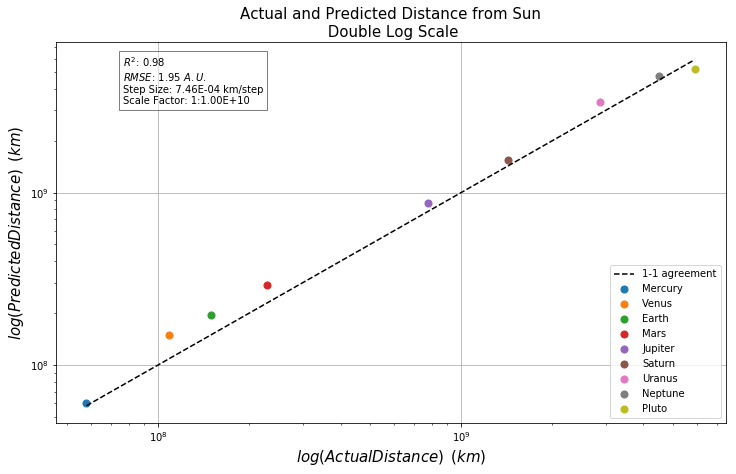

In [0]:
#@title
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(1, 1, 1)

for p in obs.itertuples():
  ax.scatter(p.ActualDistance, p.EstDist, label=p.Name, s=50)

ax.plot(np.linspace(min(obs.ActualDistance),max(obs.ActualDistance),20),
        np.linspace(min(obs.ActualDistance),max(obs.ActualDistance),20),'k--',
       label = '1-1 agreement') # plot 1-1 agreement line

ax.text(0.1, 0.9, f"$R^2$: {round(r_squared(obs.ActualDistance, obs.EstDist),3)}\n"
        f"$RMSE$: {round(rmse(obs.ActualDistance, obs.EstDist)/AstronomicalUnit,2)} $A.U.$"
         "\nStep Size: %.2E km/step" %kmPerStep +
         "\nScale Factor: 1:%.2E" % ScaleFactor,
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'),
         ha="left", va="center",transform=ax.transAxes)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('$log(Actual Distance)\enspace(km)$',fontsize=15)
ax.set_ylabel('$log(Predicted Distance)\enspace (km)$',fontsize=15)
ax.grid()
ax.legend(loc='lower right')
_=ax.set_title('Actual and Predicted Distance from Sun\n Double Log Scale', fontsize=15)

# A Study of Planetary Density

## Plot of Planetary Mass versus Radius

While walking the Solar System Model, I was struck by the variation in planetary size (a planet's radius in multiples of the Earth's) and its mass (also in multiples of the Earth's mass). This observation caused me to wonder if there's any pattern that would lead to insight.

The figure below shows a planet's mass plotted as a function of its radius.  The planets appear to fall along a parabolic curve, maybe.

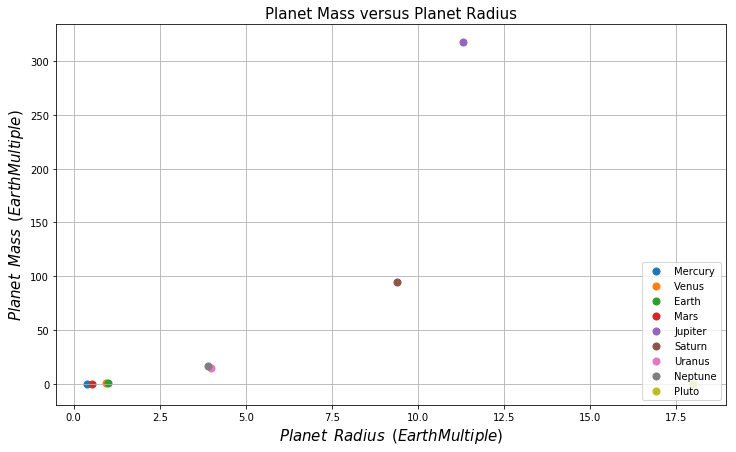

In [0]:
#@title
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(1, 1, 1)

for p in obs.itertuples():
  ax.scatter(p.Radius, p.Mass, label=p.Name, s=50)





ax.set_xlabel('$Planet\enspace Radius\enspace(Earth Multiple)$',fontsize=15)
ax.set_ylabel('$Planet\enspace Mass\enspace (Earth Multiple)$',fontsize=15)
ax.grid()
ax.legend(loc='lower right')
_=ax.set_title('Planet Mass versus Planet Radius', fontsize=15)

## Planetary Density Relative to that of Earth

The graph above can't provide inference as to whether a planet is more massive just because it is larger or perhaps its elemental composition is different.

Looking at a planet's density might provide some insight.
Density is a measure of mass per unit of volume.  That two planets have similar densities might support a theory that their compositions are similar dispite the planets having disimilar sizes and masses.

The volume of a sphere is given by:
$$
V = \frac{4}{3}\pi r^3
$$

If the radius of the sphere increases by a factor of $2$, the volume will increase by a factor of $2^3$ or 8. Thus if a planet is twice the diameter of the Earth, it's mass will need to be 8-fold that of Earth to maintain equal density.

Suppose Planet $P_2$ with radius $r_2$ and mass $m_2$, where $r_2 = k*r_{Earth}$ and $m_2 = l*m_{Earth}$.

Density of Planet $P_2$:
$$
D_2 = m_2/V_2
$$
$$D_2 = \frac{l*m_{Earth}}{\frac{4}{3}\pi (kr_{Earth})^3}
$$
Ratio of densities:
$$
\frac{D_2}{D_{Earth}} =\frac
{\frac{l*m_{Earth}}{\frac{4}{3}\pi (kr_{Earth})^3}}
{\frac{m_{Earth}}{\frac{4}{3}\pi (r_{Earth})^3}}
$$
$$
\frac{D_2}{D_{Earth}} =\frac{l}{k^3}
$$

so the multiple of the density of Planet $P_2$ to that of Earth is the ratio of $P_2$'s Earth mass-multiple divided by the cube of $P_2$'s Earth-diameter multiple.

In [0]:
#@title
#compute relative density. Both Mass and Radius are in Earth-multiples
obs['RelativeDensity'] = obs.Mass/obs.Radius**3

In [0]:
obs[['Name','Radius','Mass','RelativeDensity']]

,Name,Radius,Mass,RelativeDensity
1,Mercury,0.38,0.056,1.020557e+00
2,Venus,0.95,0.620,7.231375e-01
3,Earth,1.00,1.000,1.000000e+00
4,Mars,0.53,0.110,7.388650e-01
5,Jupiter,11.30,317.900,2.203206e-01
7,Saturn,9.40,95.100,1.144978e-01
8,Uranus,4.00,14.400,2.250000e-01
10,Neptune,3.90,17.100,2.882719e-01
11,Pluto,18.00,0.002,3.429355e-07


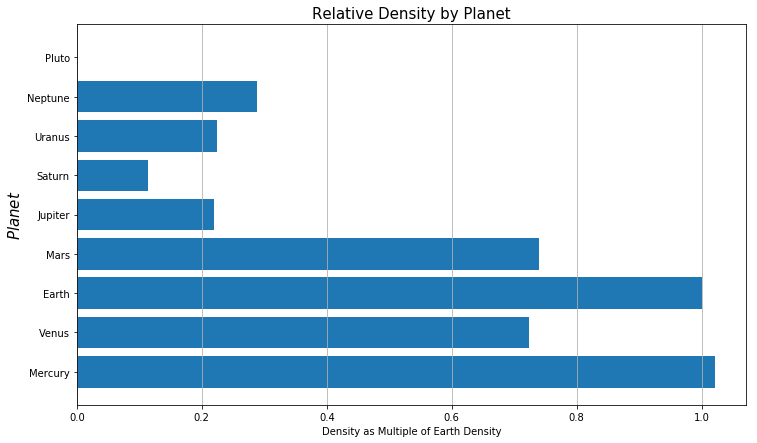

In [0]:
#@title
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(1, 1, 1)

y_pos = np.arange(len(obs))
ax.barh(y_pos, obs.RelativeDensity)

ax.set_yticks(y_pos)
ax.set_ylabel('$Planet$', fontsize=15)
ax.set_xlabel('Density as Multiple of Earth Density')
ax.grid(axis='x')
ax.set_title('Relative Density by Planet', fontsize=15)
_=ax.set_yticklabels(obs.Name)

The figure above shows each planet's density relative to that of Planet Earth.  Mercury and Earth have about the same density, Mars and Venus are about the same but different from Earth, and Saturn, Jupiter, Neptune and Uranus exhibit much lower densities.  Pluto doesn't even move the needle!